In [1]:
# https://data.austintexas.gov/browse?category=Locations+and+Maps&page=5
from math import radians, cos, sin, asin, sqrt, atan2
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
from descartes import PolygonPatch
import shapefile
from matplotlib.lines import Line2D
import warnings
import matplotlib.colors as colors
from shapely.geometry import Point
from matplotlib import pyplot
import numpy as np
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', None)

In [2]:
Austin_Traffic_Cameras = "C:\\Users\\lilyx\\DataViz\\Data\\Austin_Traffic_Cameras\\geo_export_04e8df9a-ae38-4723-bb27-ea49bf508ab9.shp"
Austin_Traffic_Cameras = gpd.read_file(Austin_Traffic_Cameras, encoding='utf-8')
Austin_Traffic_Cameras.head(1)

,camera_id,location_n,camera_sta,date_turn_,time_turn_,camera_mfg,atd_locati,landmark,signal_eng,council_di,jurisdicti,location_t,primary__2,cross_st_s,primary__3,primary_st,primary__4,cross_st_b,cross_st,cross_st_a,coa_inters,date_modif,time_modif,ip_comm_st,date_comm_,time_comm_,published_,screenshot,funding,id,geometry
0,275,2731 BLK S CAPITAL OF TEXAS HWY NB (Barton Cre...,TURNED_ON,None,None,Sarix,LOC16-004315,Barton Creek Mall,SOUTHWEST,8,AUSTIN FULL PURPOSE,ROADWAY,None,None,2731.0,CAPITAL OF TEXAS HWY,None,NaN,None,None,5149533.0,2021-01-26,22:33:00.000,OFFLINE,2020-10-06,08:35:00.000,None,http://atdatmsweb2.austintexas.gov/CCTVImages/...,None Identified,582a419b5e304c982be5c3c8,POINT (-97.80891 30.25372)


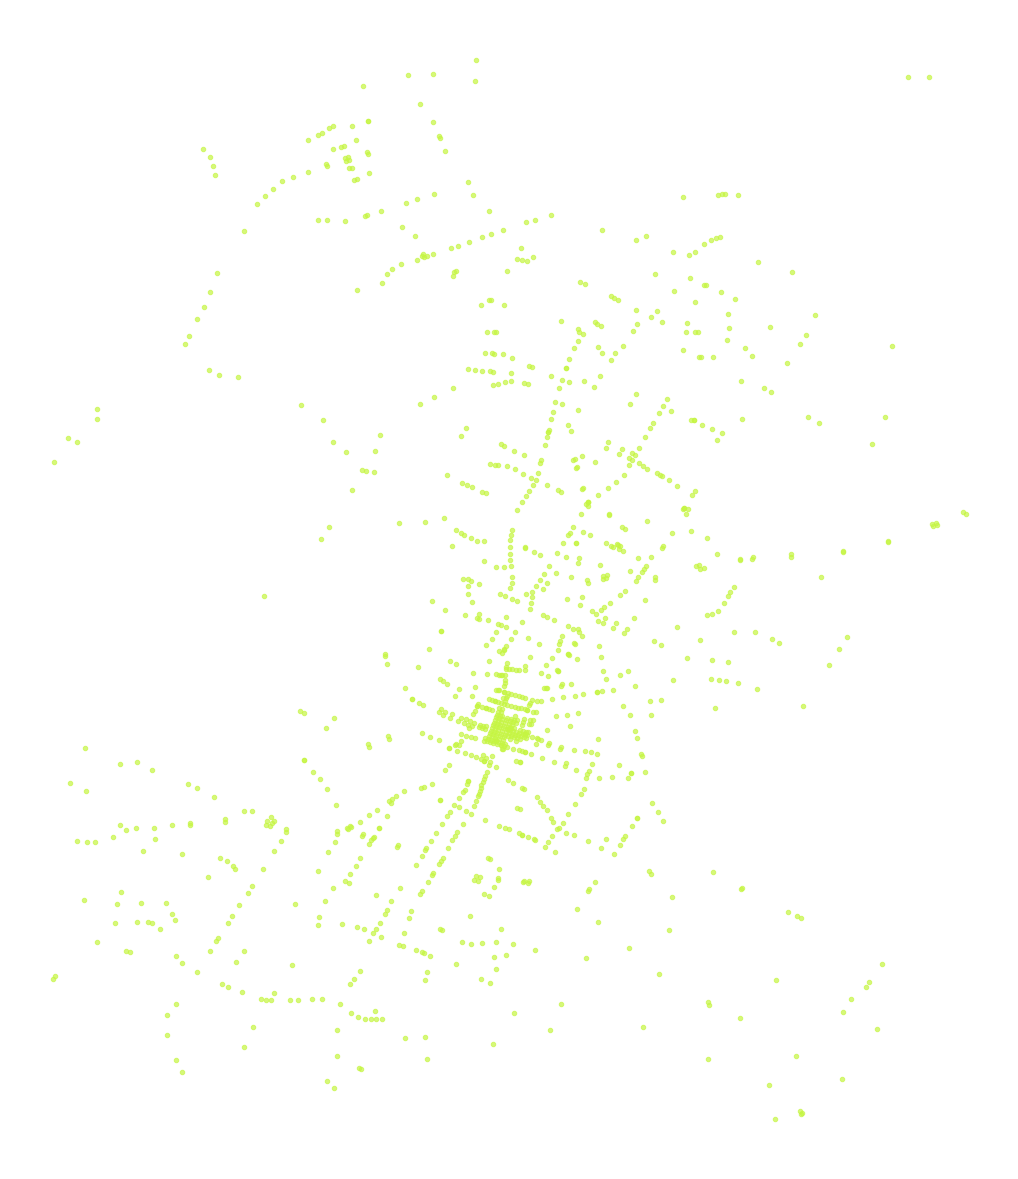

In [5]:
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
Austin_Traffic_Cameras.plot(ax=ax, markersize = 20, color='#c5f542', alpha = 0.7)

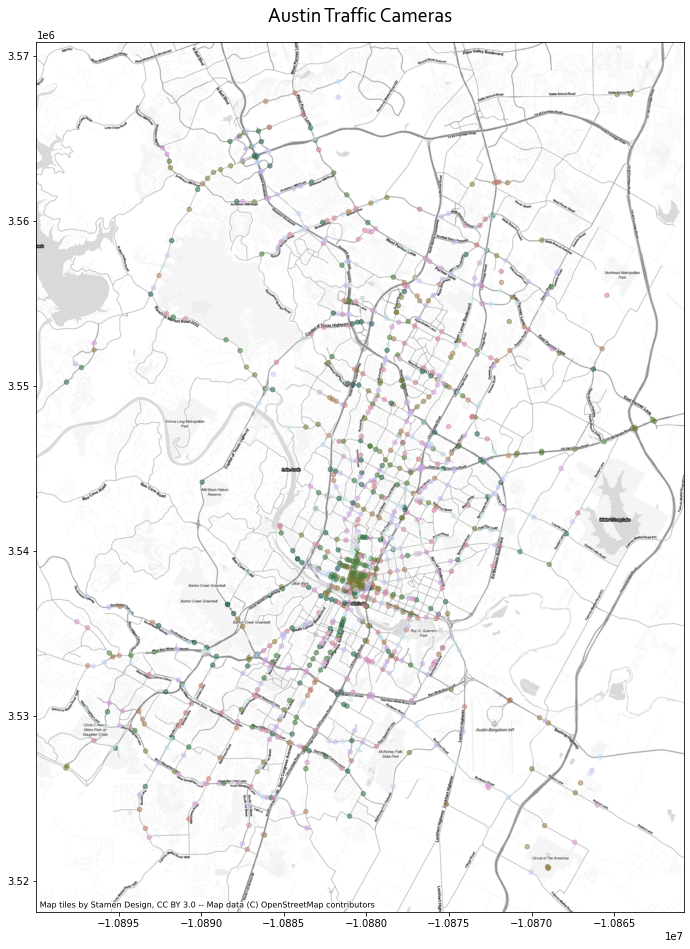

In [18]:
import contextily as ctx

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmapb = plt.get_cmap('cubehelix')
grays = truncate_colormap(cmapb, 0.25, 0.99)

Austin_Traffic_Cameras = Austin_Traffic_Cameras.to_crs(epsg=3857)
ax = Austin_Traffic_Cameras.plot(figsize = (18,16), markersize = 20, cmap=grays, alpha=0.5, edgecolor=None)
plt.title("Austin Traffic Cameras", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=20);
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite, zoom=13)